In [14]:
import pandas as pd

In [15]:
#step 1
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
#step 2 cleaning /preprocessing
df["Age"]=df["Age"].fillna(df['Age'].median())
df.isnull().sum()

#remove unwanted columns which is not required
df=df.drop(["PassengerId","Cabin","Name","Ticket","Embarked","Fare","SibSp","Parch"],axis=1)
df.columns



Index(['Survived', 'Pclass', 'Sex', 'Age'], dtype='object')

In [17]:
# convert categorical data or value to numerical 
df.loc[df["Sex"]=="male","Sex"]=0
df.loc[df["Sex"]=="female","Sex"]=1
df.head()

,Survived,Pclass,Sex,Age
0,0,3,0,34.5
1,1,3,1,47.0
2,0,2,0,62.0
3,0,3,0,27.0
4,1,3,1,22.0


In [43]:
#step 3 Divide data into TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X=df.drop(["Survived"],axis=1)
Y=df["Survived"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=156)

In [44]:
#step 4 TRAIN DATA/Model
from sklearn.linear_model import LogisticRegression
my_model= LogisticRegression()
Result=my_model.fit(X_train,Y_train)

In [48]:
#step 5 TEST model
predictions=Result.predict(X_test)
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [49]:
#for ACCURACY SCORE

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)


1.0

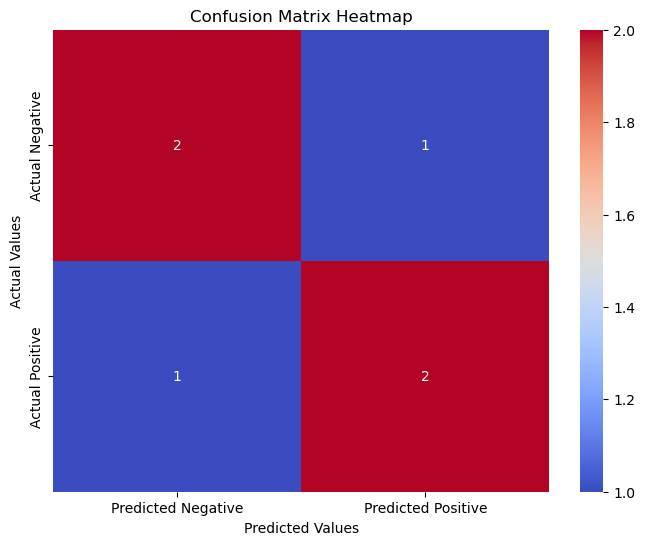

In [59]:
#PERFORMANCE MEASURE

#confusion_df=pd.DataFrame(confusion_matrix,index=["Actual Negative","Actual positive"],columns=["Predicted Negative","Predicted Positive"])
#confusion_df
#color_confusion_matrix= sns.heatmap(confusion_df,cmap="coolwarm",annot= True)

from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data for y_true (actual labels) and y_pred (predicted labels)
y_true = [0, 1, 0, 1, 0, 1]  # Actual values
y_pred = [0, 1, 0, 0, 1, 1]  # Predicted values

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create DataFrame for the confusion matrix
confusion_df = pd.DataFrame(
    conf_matrix,
    index=["Actual Negative", "Actual Positive"],
    columns=["Predicted Negative", "Predicted Positive"]
)

# Plot the heatmap
plt.figure(figsize=(8, 6))
color_confusion_matrix = sns.heatmap(confusion_df, cmap="coolwarm", annot=True)
plt.title("Confusion Matrix Heatmap")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()


In [70]:
from sklearn.metrics import classification_report

# Example data
y_true = [0, 1, 0, 1, 1]  # Actual labels
y_pred = [0, 1, 0, 0, 1]  # Predicted labels

# Generate the classification report
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [73]:
#step 7 Deploy model

pred_new=my_model.predict([[55,27,2]])
pred_new

D:\WUDownloadCache\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)